In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

In [2]:
df = pd.read_csv('fruitvegprices-2017_2022.csv')

In [3]:
df.describe()

,price
count,9647.000000
mean,1.528333
std,1.927865
min,0.020000
25%,0.540000
50%,0.880000
75%,1.500000
max,17.600000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0732471c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd073247820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd07322bfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd073247d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd073247fd0>],
 'means': []}

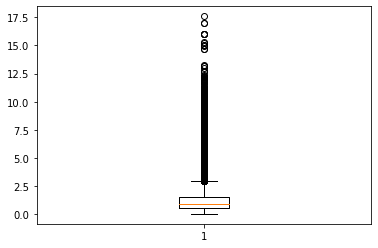

In [4]:
plt.boxplot(df['price'])

In [5]:
np.median(df['price'])

0.88

# EDA - Exploratory Data Analysis

In [6]:
df['date'] =  pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year

**Obtenemos el porcentaje de valores que representa cada año en el 100% de la información del DataFrame**

In [8]:
df.loc[:,['year']].value_counts() / df.shape[0]

year
2018    0.244532
2019    0.235410
2020    0.224422
2021    0.224111
2017    0.038872
2022    0.032653
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd0729b9dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd0729473a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd0729b9af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd072947940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd072947c10>],
 'means': []}

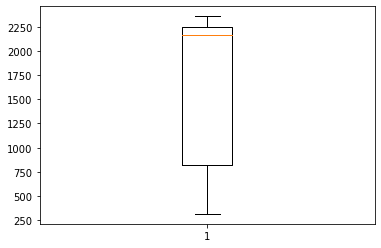

In [9]:
plt.boxplot(df.loc[:, ['year']].value_counts())

**Obtenemos el porcentaje que representan las categorías en el dataset completo**

In [10]:
df.loc[ : , ["category"] ].value_counts() / df.shape[0]

category   
vegetable      0.752980
fruit          0.206489
cut_flowers    0.035451
pot_plants     0.005079
dtype: float64

**Como ya sabemos que los años 2022 y 2017 son los que menos datos poseen dentro del dataset y como la category pot_plants es la que menos entradas poseen dentro del dataset, los excluimos del boxplot**

In [11]:
df = df.loc[~df['year'].isin([2017, 2022]), :]
df = df.loc[df['category'] != 'plot_plants', :]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd07293d190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd07293d730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd07292be80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd07293dcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd07293dfa0>],
 'means': []}

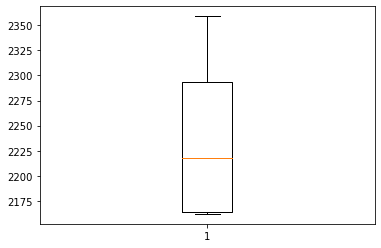

In [12]:
plt.boxplot( df.loc[:, ['year']].value_counts())

In [13]:
df.loc[:, ['year']].value_counts()

year
2018    2359
2019    2271
2020    2165
2021    2162
dtype: int64

<AxesSubplot:xlabel='year', ylabel='price'>

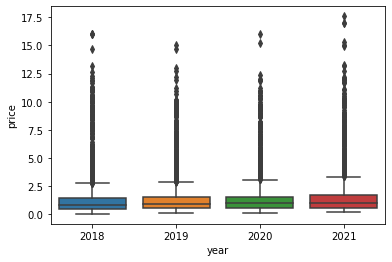

In [14]:
sns.boxplot( data=df  , x="year" , y="price" )

In [15]:
df.loc[ : , ["category"] ].value_counts()

category   
vegetable      6785
fruit          1838
cut_flowers     296
pot_plants       38
dtype: int64

<AxesSubplot:xlabel='item', ylabel='price'>

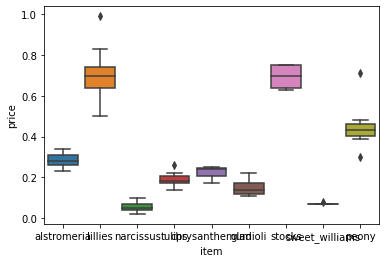

In [16]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2018) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='price'>

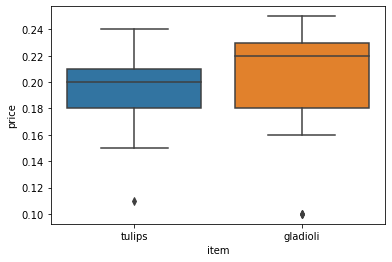

In [17]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2019) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='price'>

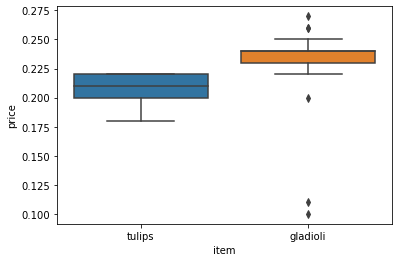

In [18]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2020) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='price'>

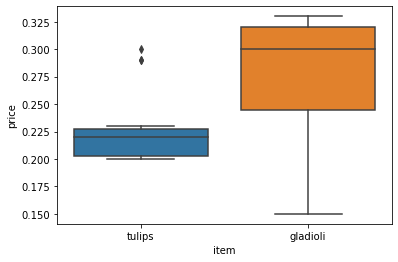

In [19]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2021) , : ]  , x="item" , y="price" )

### Experimento para encontrar valores atipicos

In [20]:
gladioni_2020 = df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2020) & (df['item'] == 'gladioli') , ['price'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd07254ed60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd07255b340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd07254ea90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd07255b8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd07255bbb0>],
 'means': []}

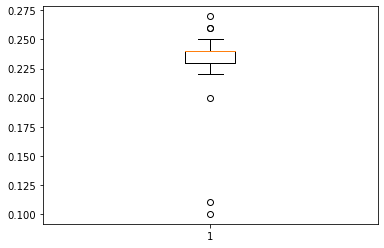

In [21]:
plt.boxplot(gladioni_2020)

In [22]:
q1 = np.quantile( gladioni_2020 , 0.25 )
q3 = np.quantile( gladioni_2020 , 0.75 )

In [23]:
q1

0.23

In [24]:
q3

0.24

In [25]:
np.median(gladioni_2020)

0.24

In [26]:
np.quantile(gladioni_2020, 0.5)

0.24

In [27]:
iqr= q3-q1

In [28]:
iqr

0.009999999999999981

In [29]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [30]:
upper_bound

0.25499999999999995

In [31]:
lower_bound

0.21500000000000002

In [32]:
gladioni_2020.loc[ (gladioni_2020['price'] > upper_bound) | (gladioni_2020['price'] < lower_bound) , : ]

,price
2701,0.10
2750,0.11
2804,0.20
3037,0.26
3506,0.26
3622,0.27


In [33]:
dfq1 = df.loc[:, ['item', 'year','price']]

In [34]:
dfq2= df.loc[:, ['item', 'year','price']]

In [35]:
dfq3 = df.loc[:, ['item', 'year','price']]

In [36]:
dfq1 = dfq1.groupby(['item', 'year'], as_index=False).quantile(0.25)
dfq1.columns = ['item', 'year', 'priceq1']

In [37]:
dfq2 = dfq2.groupby(['item', 'year'], as_index=False).mean()
dfq2.columns = ['item', 'year', 'priceq2']

In [38]:
dfq3 = dfq3.groupby(['item', 'year'], as_index=False).quantile(0.75)
dfq3.columns = ['item', 'year', 'priceq3']

In [39]:
dfiqr = dfq1.merge(dfq2, how="inner", on=['item', 'year'])

In [40]:
dfiqr = dfiqr.merge(dfq3, how='inner', on=['item', 'year'])

In [41]:
dfiqr['iqr'] = dfiqr.apply(lambda r: r['priceq3'] - r['priceq1'], axis=1)

In [42]:
dfiqr['upper'] = dfiqr.apply(lambda r: r['priceq3'] + (1.5*r['iqr']), axis=1)
dfiqr['lower'] = dfiqr.apply(lambda r: r['priceq1'] - (1.5*r['iqr']), axis=1)

In [43]:
dfiqr

,item,year,priceq1,priceq2,priceq3,iqr,upper,lower
0,alstromeria,2018,0.2600,0.282200,0.3100,0.0500,0.38500,0.18500
1,apples,2018,0.7400,0.884112,0.9300,0.1900,1.21500,0.45500
2,apples,2019,0.8100,0.906705,0.9900,0.1800,1.26000,0.54000
3,apples,2020,0.9200,1.156789,1.2500,0.3300,1.74500,0.42500
4,apples,2021,0.9600,1.106423,1.2300,0.2700,1.63500,0.55500
...,...,...,...,...,...,...,...,...
178,turnip,2019,0.9500,1.160000,1.4075,0.4575,2.09375,0.26375
179,turnip,2020,1.1800,1.353784,1.5400,0.3600,2.08000,0.64000
180,turnip,2021,1.3000,1.438400,1.6775,0.3775,2.24375,0.73375
181,watercress,2018,8.6975,9.516400,10.5250,1.8275,13.26625,5.95625


In [44]:
dft = df.merge(dfiqr, on=['item', 'year'], how='left')

In [45]:
dft = dft.loc[:, ['category', 'item', 'variety','year', 'priceq1', 'priceq2', 'priceq3', 'iqr', 'upper', 'lower', 'price']]

In [46]:
dft['newPrice'] = dft.apply(lambda r: r['priceq2'] if (r['price'] <= r['lower'] or r['price'] >= r['upper']) else r['price'] , axis=1)

In [47]:
dft.head(5)

,category,item,variety,year,priceq1,priceq2,priceq3,iqr,upper,lower,price,newPrice
0,fruit,apples,bramleys_seedling,2021,0.96,1.106423,1.23,0.27,1.635,0.555,1.69,1.106423
1,fruit,apples,coxs_orange_group,2021,0.96,1.106423,1.23,0.27,1.635,0.555,0.97,0.970000
2,fruit,apples,egremont_russet,2021,0.96,1.106423,1.23,0.27,1.635,0.555,1.06,1.060000
3,fruit,apples,braeburn,2021,0.96,1.106423,1.23,0.27,1.635,0.555,0.84,0.840000
4,fruit,apples,gala,2021,0.96,1.106423,1.23,0.27,1.635,0.555,0.94,0.940000


<AxesSubplot:xlabel='item', ylabel='newPrice'>

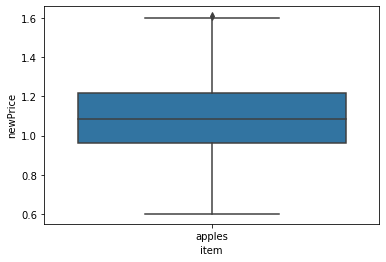

In [48]:
sns.boxplot(data = dft.loc[(dft['category'] == 'fruit') &(dft['item']=='apples') & (dft['year'] == 2021), :], x='item', y='newPrice')

<AxesSubplot:xlabel='item', ylabel='price'>

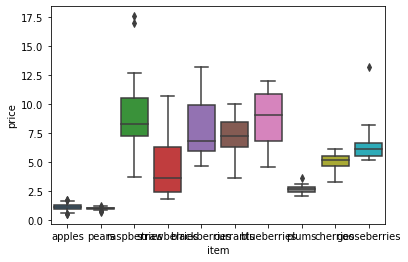

In [54]:
sns.boxplot(data = df.loc[(df['category'] == 'fruit') & (df['year'] == 2021), :], x='item', y='price')

<AxesSubplot:xlabel='item', ylabel='newPrice'>

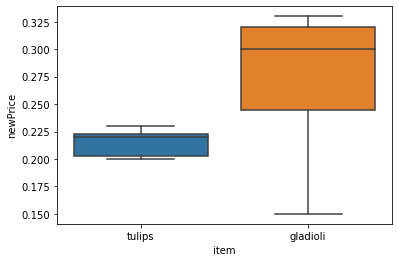

In [50]:
sns.boxplot(data = dft.loc[(dft['category'] == 'cut_flowers') & (dft['year'] == 2021), :], x='item', y='newPrice')

<AxesSubplot:xlabel='item', ylabel='price'>

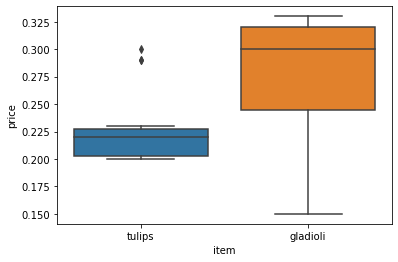

In [51]:
sns.boxplot(data = df.loc[(df['category'] == 'cut_flowers') & (df['year'] == 2021), :], x='item', y='price')

(array([6., 0., 4., 0., 0., 6., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 2., 0., 1.]),
 array([0.2  , 0.204, 0.208, 0.212, 0.216, 0.22 , 0.224, 0.228, 0.232,
        0.236, 0.24 , 0.244, 0.248, 0.252, 0.256, 0.26 , 0.264, 0.268,
        0.272, 0.276, 0.28 , 0.284, 0.288, 0.292, 0.296, 0.3  ]),
 <BarContainer object of 25 artists>)

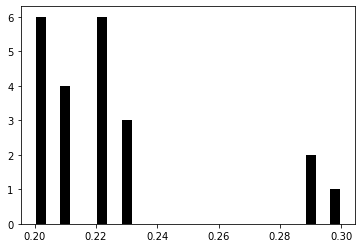

In [52]:
plt.hist(x=df.loc[(df['category'] == 'cut_flowers') & (df['item'] == 'tulips') & (df['year'] == 2021),['price']], bins=25, color='black', rwidth=0.80)

(array([6., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 6.,
        0., 0., 0., 3., 0., 0., 0., 3.]),
 array([0.2   , 0.2012, 0.2024, 0.2036, 0.2048, 0.206 , 0.2072, 0.2084,
        0.2096, 0.2108, 0.212 , 0.2132, 0.2144, 0.2156, 0.2168, 0.218 ,
        0.2192, 0.2204, 0.2216, 0.2228, 0.224 , 0.2252, 0.2264, 0.2276,
        0.2288, 0.23  ]),
 <BarContainer object of 25 artists>)

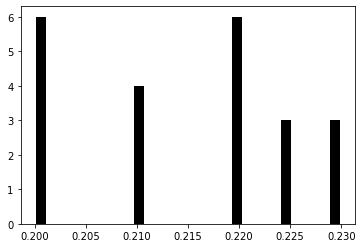

In [53]:
plt.hist(x=dft.loc[(dft['category'] == 'cut_flowers') & (dft['item'] == 'tulips') & (dft['year'] == 2021),['newPrice']], bins=25, color='black', rwidth=0.80)